In [4]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 25 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 1s (49.7 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 144568 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Setting up libgeos-dev (3.6.2-1

In [5]:
!pip install pyproj==1.9.6

     |████████████████████████████████| 2.8MB 2.8MB/s 
  Created wheel for pyproj: filename=pyproj-1.9.6-cp36-cp36m-linux_x86_64.whl size=3702107 sha256=0e0d1440bcf3c3c918ec5d63faeebb87334efcbefc9b1cdb0af28ef03289f346
  Stored in directory: /root/.cache/pip/wheels/02/cd/b1/a2d6430f74c7a778a43d62f78bec109ca69c732dc9b929142a
Successfully built pyproj
  Found existing installation: pyproj 2.6.0
    Uninstalling pyproj-2.6.0:
      Successfully uninstalled pyproj-2.6.0


In [0]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

In [0]:
import pandas as pd
import numpy as np

In [0]:
bfire = pd.read_csv("/content/Aus_bushfire.csv")

In [8]:
bfire.Country.unique()

array(['AU'], dtype=object)

In [0]:
bfire = bfire[bfire.Country == 'AU']
del bfire['Unnamed: 0']

In [90]:
bfire

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,confidence,version,bright_ti5,frp,daynight,new lat,new long,Sub Urban,State,Region,Country
0,-42.12143,147.96153,304.2,0.33,0.56,04-12-2019,14:12,1,nominal,1.0NRT,280.0,1.6,N,-42.78161,147.56267,Sorell,Tasmania,Sorell,AU
1,-42.12246,147.96536,300.6,0.33,0.56,04-12-2019,14:12,1,nominal,1.0NRT,278.8,1.6,N,-42.78161,147.56267,Sorell,Tasmania,Sorell,AU
2,-42.12349,147.96916,307.2,0.33,0.56,04-12-2019,14:12,1,nominal,1.0NRT,278.3,2.8,N,-42.78161,147.56267,Sorell,Tasmania,Sorell,AU
3,-42.12545,147.97643,297.8,0.33,0.56,04-12-2019,14:12,1,nominal,1.0NRT,278.6,3.8,N,-42.78161,147.56267,Sorell,Tasmania,Sorell,AU
4,-42.12209,147.94337,296.0,0.34,0.56,04-12-2019,14:12,1,nominal,1.0NRT,279.7,0.8,N,-42.78161,147.56267,Sorell,Tasmania,Sorell,AU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678563,-30.86724,121.48753,307.0,0.45,0.63,20-04-2020,17:42,1,nominal,1.0NRT,284.4,1.6,N,-30.78204,121.49120,Boulder,Western Australia,Kalgoorlie/Boulder,AU
678564,-30.86910,116.27620,325.3,0.44,0.46,20-04-2020,17:42,1,nominal,1.0NRT,285.0,2.1,N,-30.64003,116.00365,Moora,Western Australia,Moora,AU
678565,-30.86863,116.27146,300.5,0.44,0.46,20-04-2020,17:42,1,nominal,1.0NRT,284.1,2.1,N,-30.64003,116.00365,Moora,Western Australia,Moora,AU
678566,-32.73023,116.04491,298.4,0.45,0.47,20-04-2020,17:42,1,nominal,1.0NRT,285.0,0.8,N,-32.84323,115.92201,Waroona,Western Australia,Waroona,AU


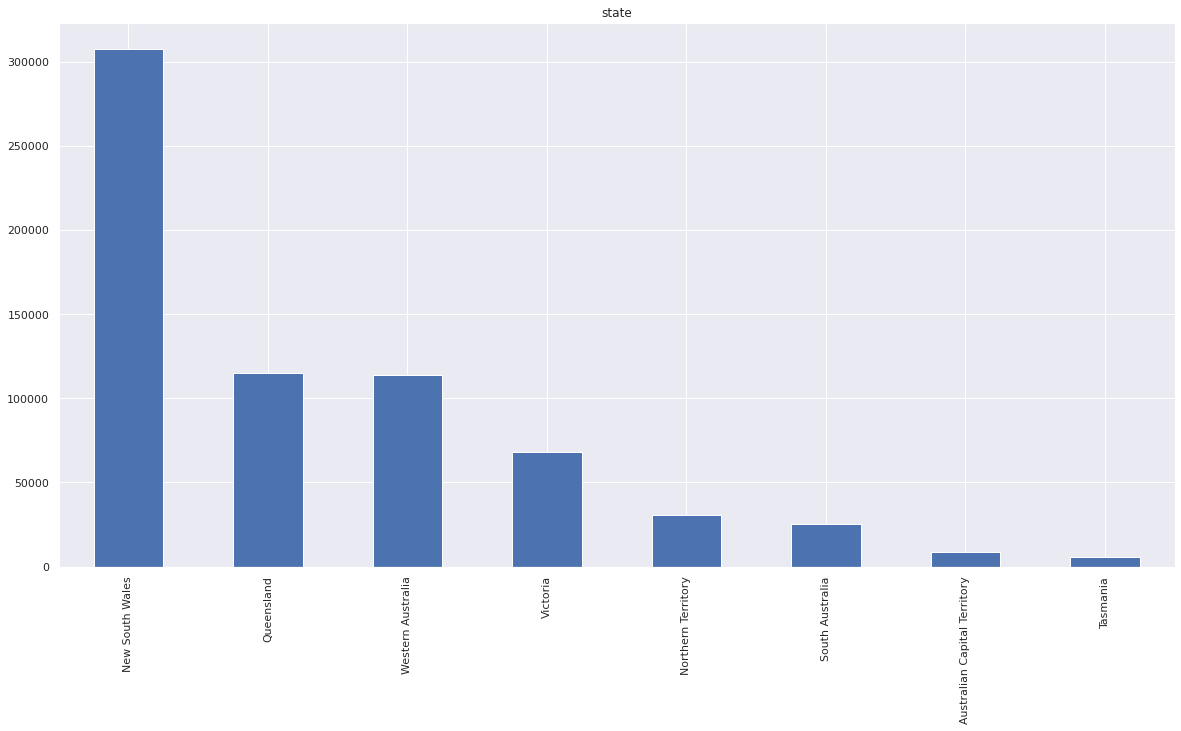

In [83]:
a=bfire['State'].value_counts().plot(kind='bar',figsize=(20,10),title="state")
plt.savefig('State.jpg')

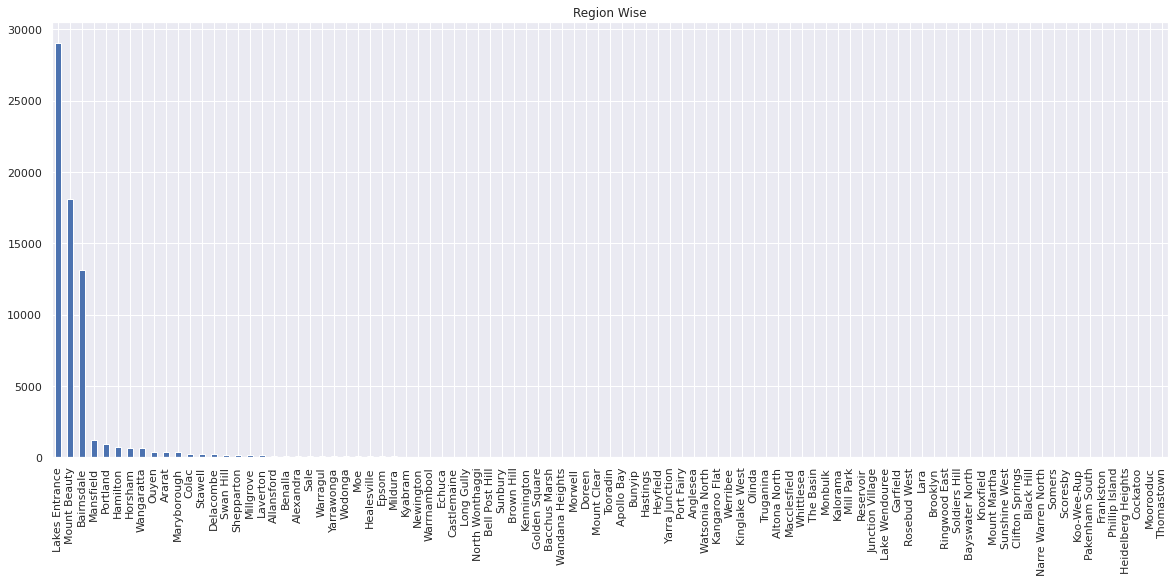

In [92]:
VIC =  bfire[bfire['State']=='Victoria']
B=VIC['Sub Urban'].value_counts().plot(kind='bar',figsize=(20,8),title='Region Wise')
plt.savefig('Victoria.jpg')

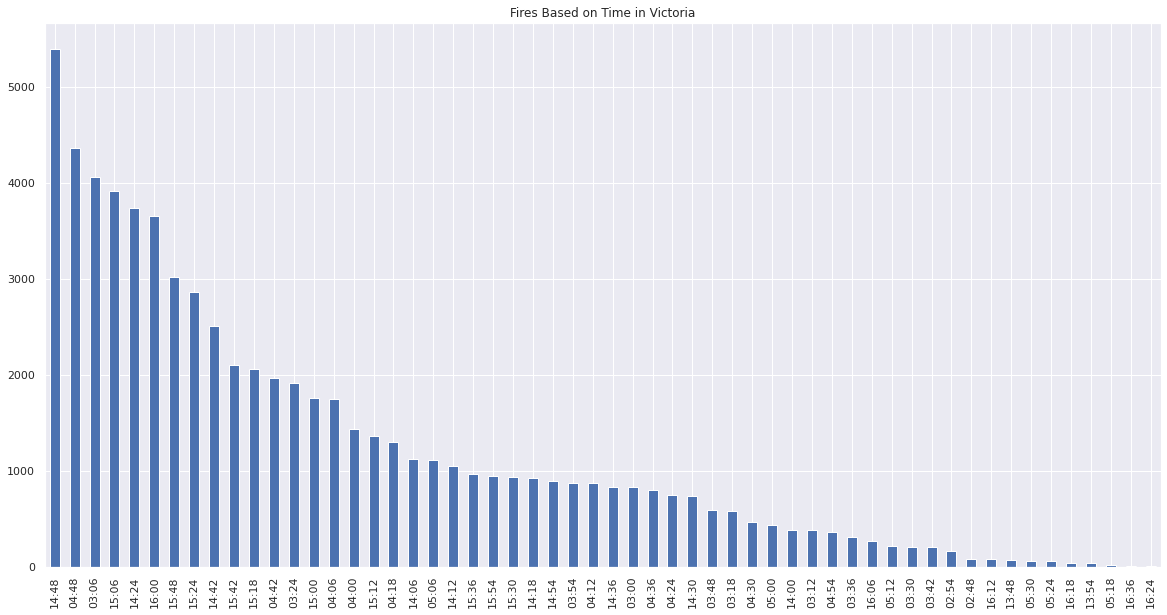

In [96]:
VIC['acq_time'].value_counts().plot(kind='bar',figsize=(20,10),title="Fires Based on Time in Victoria")

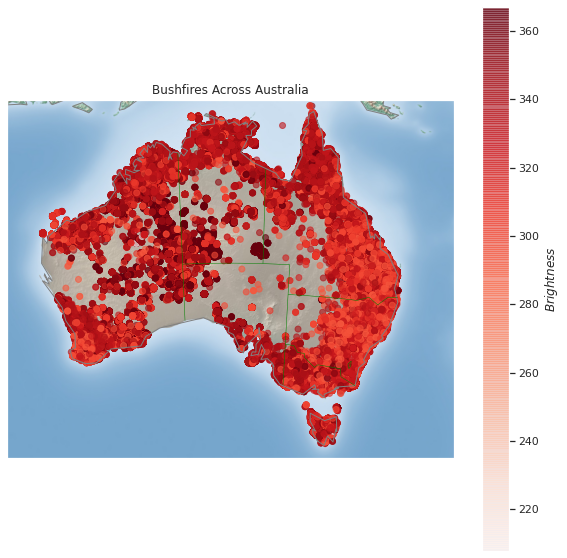

In [85]:
lat = bfire['latitude'].values
lon = bfire['longitude'].values
brg = bfire['bright_ti4'].values

fig = plt.figure(figsize = (10, 10))
m = Basemap(projection = 'lcc', resolution='c', lat_0 =-27.6, lon_0 = 134.35,width=5E6, height=4E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='green')
m.drawstates(color='green')

m.scatter(lon, lat, c= brg,latlon=True,cmap='Reds', alpha=0.6)
plt.title("Bushfires Across Australia")
plt.colorbar(label=r'$Brightness$')
plt.savefig('Bushfire Australia.jpg')

In [52]:
bfire['bright_ti4'].max()

367.0

In [0]:
main_hot = bfire[bfire['bright_ti4']>=367]

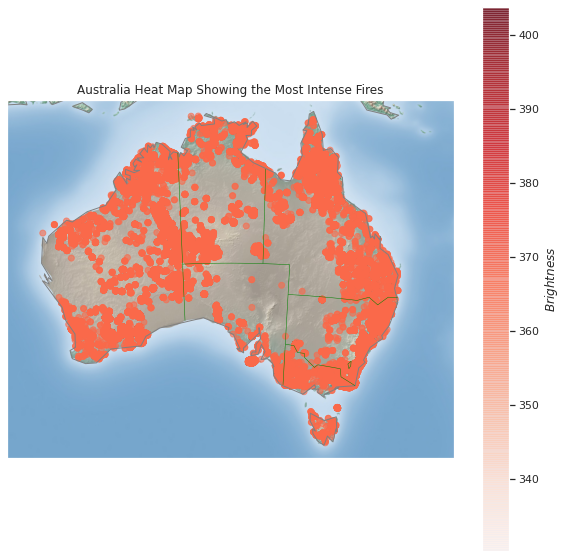

In [86]:
lat = main_hot['latitude'].values
lon = main_hot['longitude'].values
brg = main_hot['bright_ti4'].values

fig = plt.figure(figsize = (10, 10))
m = Basemap(projection = 'lcc', resolution='c', lat_0 =-27.6, lon_0 = 134.35,width=5E6, height=4E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='green')

m.scatter(lon, lat, c= brg,latlon=True,cmap='Reds', alpha=0.6)
plt.title("Australia Heat Map Showing the Most Intense Fires")
plt.colorbar(label=r'$Brightness$')
plt.savefig('Most Intense Fires.jpg')